In [467]:
import numpy as np
import pandas as pd

from linear_regression_experiements.data.adult import get_adult_dataset
from utils import *
from data.california_house import get_california_housing_dataset
from data.penguin import get_penguins_dataset

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [468]:
def get_dataset(dataset: str) -> Tuple[List[np.ndarray], List[np.ndarray], List[np.ndarray], List[np.ndarray]]:
    if dataset == 'penguins':
        return get_penguins_dataset()
    elif dataset == 'california_house':
        return get_california_housing_dataset()
    elif dataset == 'adult':
        return get_adult_dataset()
    else:
        del Xs_train, Xs_test, ys_train, ys_test
        raise NotImplementedError(f'Dataset {dataset} not implemented')

Xs_train, Xs_test, ys_train, ys_test = get_dataset("adult")

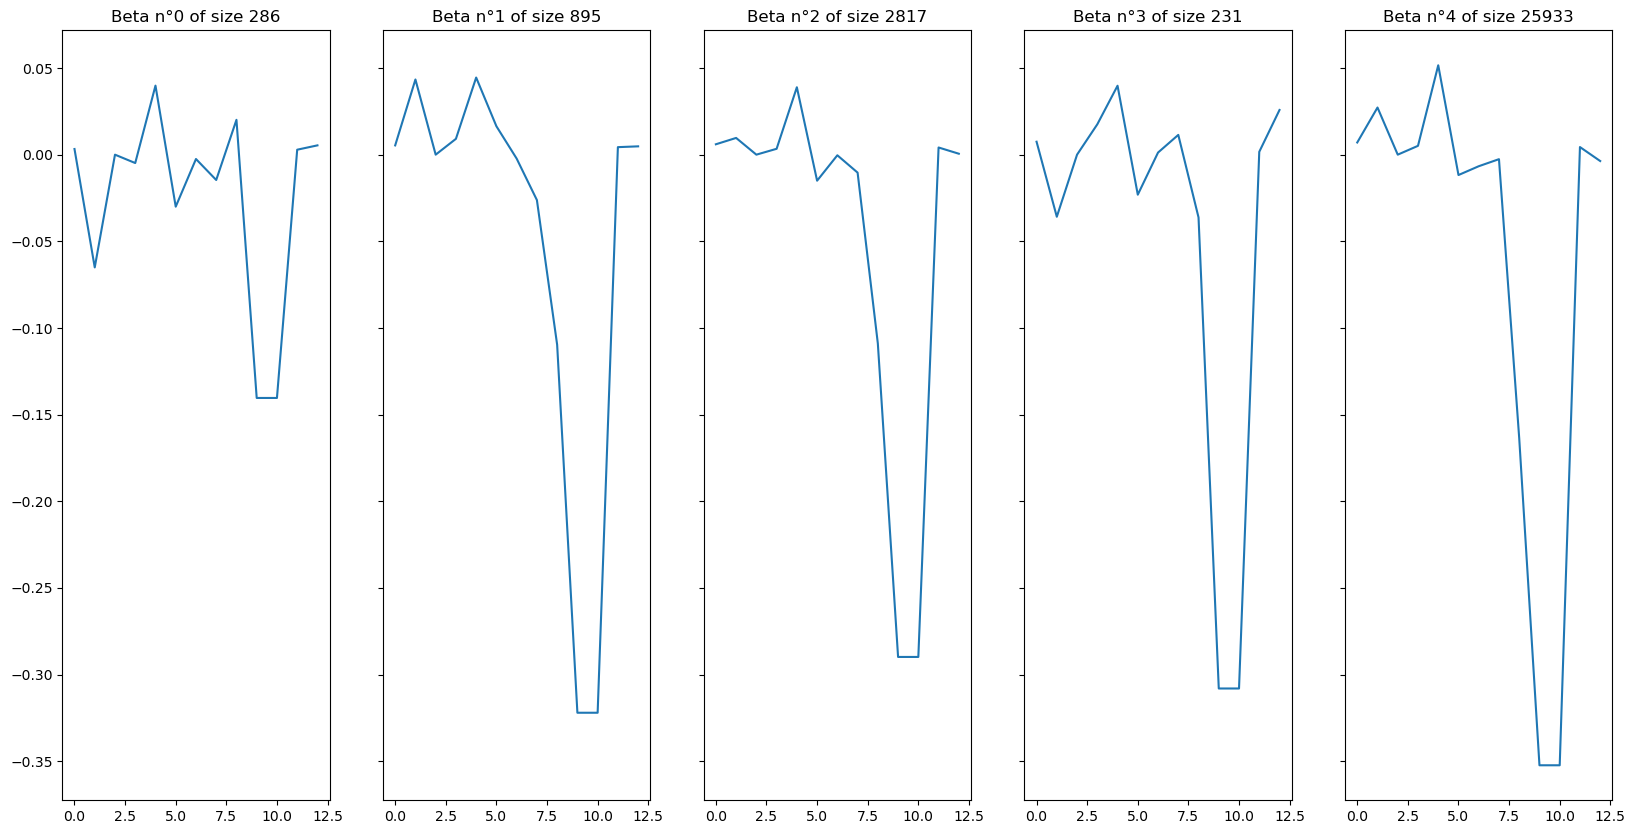

In [469]:
betas, std_squared, sizes = train(Xs_train, ys_train)
plot_betas(betas, sizes)

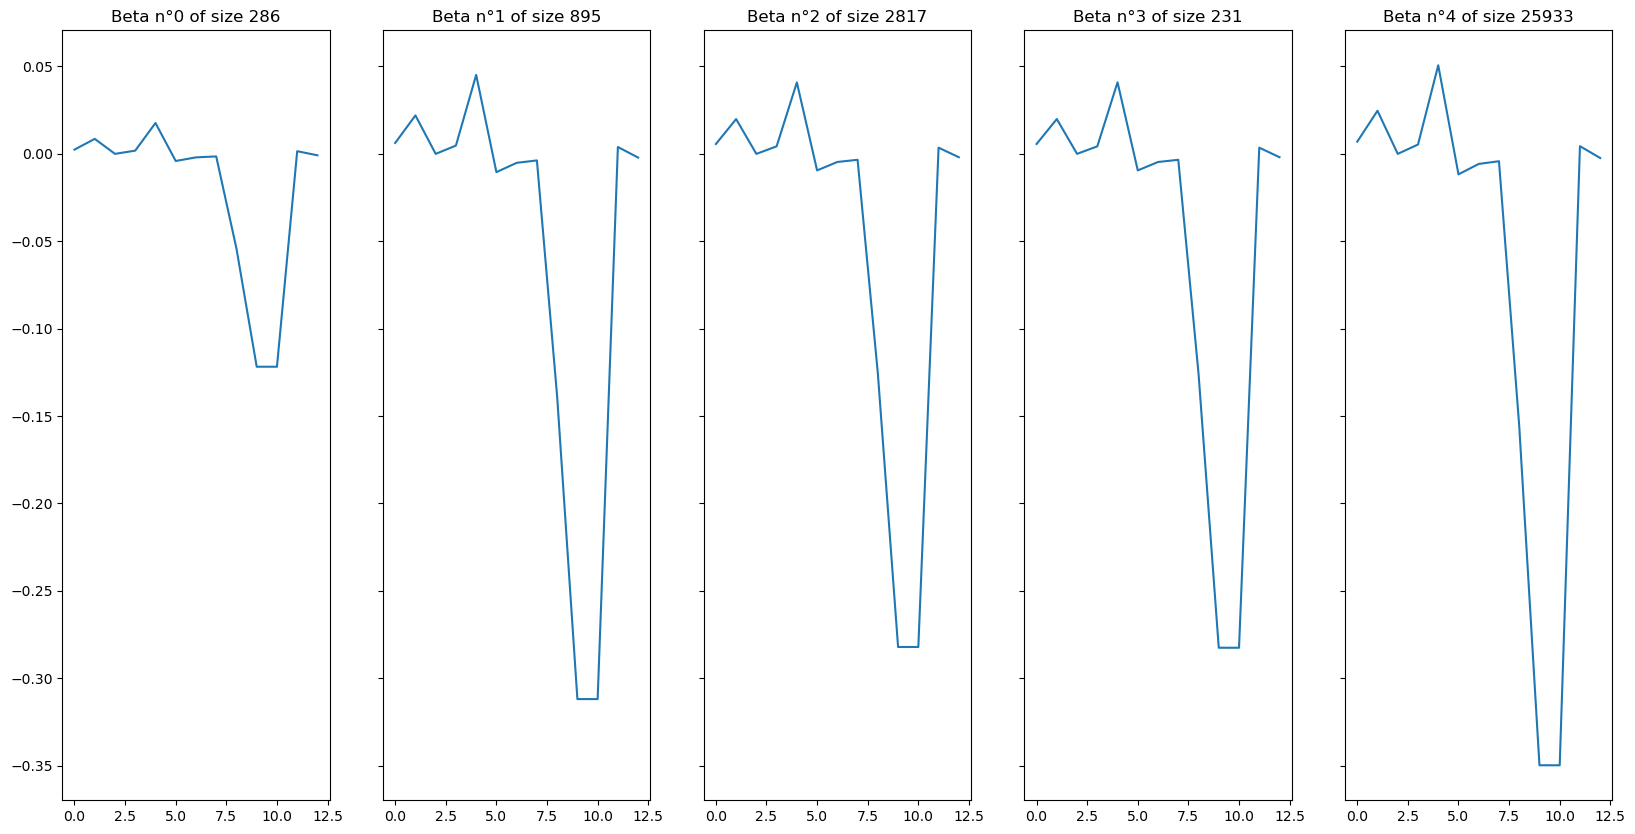

In [470]:
betas_local = betas
Ws = OLS_iterative_fusion(betas, std_squared, num_iter=10)
betas_fusion = get_fusion_betas(betas, Ws)
plot_betas(betas_fusion, sizes)

scores: [[0.11654004 0.13262099 0.15427687 0.16928282 0.08883657]
 [0.10803581 0.13078569 0.15377375 0.17035419 0.09014049]]


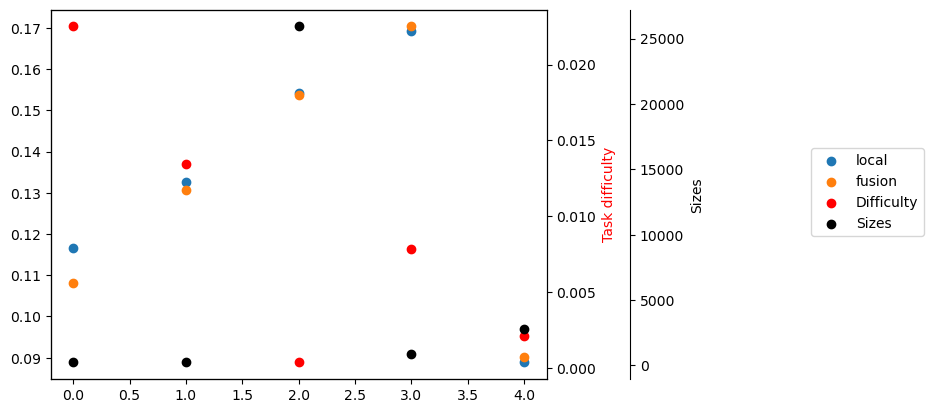

In [471]:
mse = get_mse_local_fusion(Xs_test, ys_test, betas_local, betas_fusion)
plot_score(mse, std_squared, sizes, order="reverse")

scores: [[0.66639676 0.77806122 0.80085606 0.78495119 0.83114489]
 [0.77125506 0.83843537 0.80176056 0.78296426 0.82184519]]


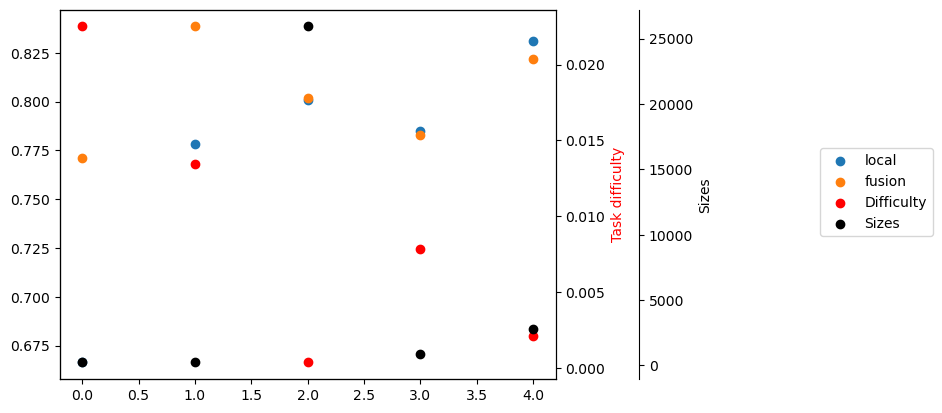

In [472]:
auc = get_auc_local_fusion(Xs_test, ys_test, betas_local, betas_fusion)
plot_score(auc, std_squared, sizes)

In [473]:
N = 1000
sum = np.zeros((N, betas.shape[0]))
for i in range(N):
    betas_fair_fusion = get_fair_fusion_betas(betas, Ws, std_squared, sizes)
    sum[i] = (get_mse_local_fusion(Xs_test, ys_test, betas_local, betas_fair_fusion)[1, :] - mse[1,:]) ** 2
    
sum = np.array(sum)

[ 1.29154964e-07  1.62244310e-08 -1.23586237e-10 -4.75631845e-07
  0.00000000e+00]
[-2.82698011e-08 -2.32178886e-08 -4.76657309e-10 -8.83930697e-08
  0.00000000e+00]
[ 1.94808242e-07  4.44091451e-09  1.19456957e-10  4.90079166e-07
 -0.00000000e+00]
[-4.32436673e-07 -6.86529404e-09 -2.72099730e-11 -6.93218582e-08
 -0.00000000e+00]
[ 1.52815797e-07  4.83885982e-09 -3.79315438e-10  1.35449461e-08
 -0.00000000e+00]
[-1.70870357e-07 -6.52535905e-09 -6.14380095e-12 -4.73145026e-08
 -0.00000000e+00]
[-1.71900455e-07  4.16481545e-09  1.12738880e-10  4.59102950e-08
  0.00000000e+00]
[ 2.42147421e-07 -2.24220358e-09 -1.09171385e-10 -1.05143286e-07
  0.00000000e+00]
[-3.86631460e-07 -6.00485830e-10 -2.16392135e-10  1.41074577e-07
  0.00000000e+00]
[ 3.67429066e-08  1.63771106e-08 -7.87556181e-11  3.33209180e-08
  0.00000000e+00]
[-1.27011285e-07  3.61061856e-09 -1.67612114e-10 -3.38399785e-07
 -0.00000000e+00]
[ 1.58137427e-07  2.90254000e-09  8.17301997e-12  6.44918064e-08
 -0.00000000e+00]
[ 2.

In [474]:
np.var(sum, axis=0), np.mean(sum, axis=0)

(array([4.86144442e-09, 1.45275906e-15, 1.70907449e-24, 1.22074847e-07,
        0.00000000e+00]),
 array([2.34964672e-05, 2.85888096e-08, 9.54370404e-13, 1.43856172e-04,
        0.00000000e+00]))

[ 2.09320825e-07  2.99440447e-10  9.40014857e-11 -4.67112154e-08
  0.00000000e+00]


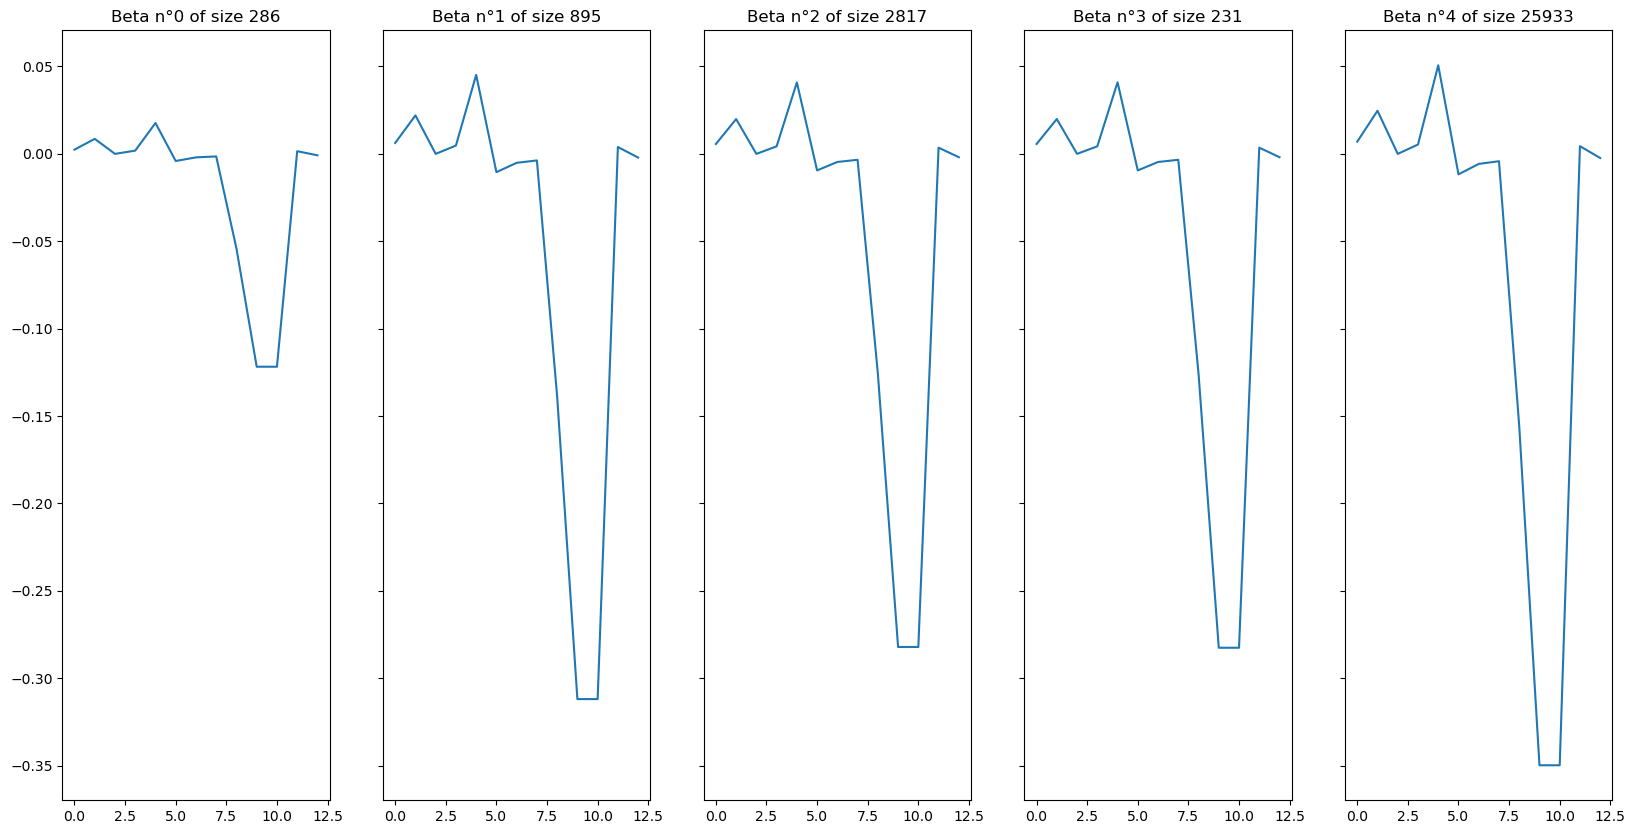

In [475]:
betas_fair_fusion = get_fair_fusion_betas(betas, Ws, std_squared, sizes)
plot_betas(betas_fair_fusion, sizes)

scores: [[0.11654004 0.15427687 0.13262099 0.16928282 0.08883657]
 [0.10574405 0.15377375 0.13286421 0.17034909 0.0901409 ]]


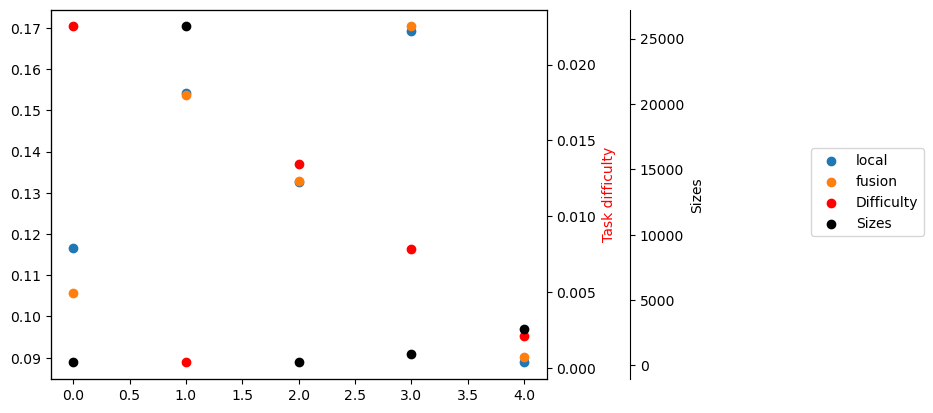

In [476]:
mse_fair = get_mse_local_fusion(Xs_test, ys_test, betas_local, betas_fair_fusion)
plot_score(mse_fair, std_squared, sizes, order="reverse")

[]

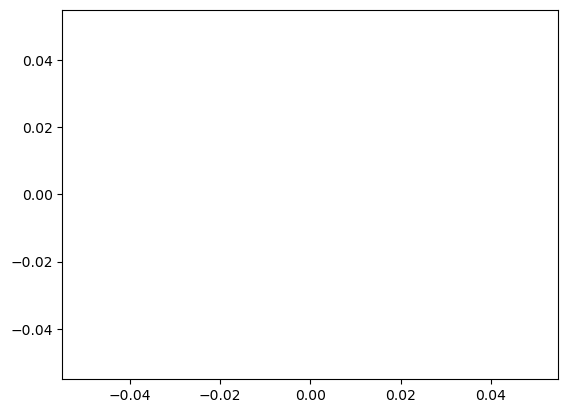

In [477]:
plt.plot()

scores: [[0.66639676 0.77806122 0.80085606 0.78495119 0.83114489]
 [0.73522267 0.84056122 0.80176056 0.78299306 0.82182125]]


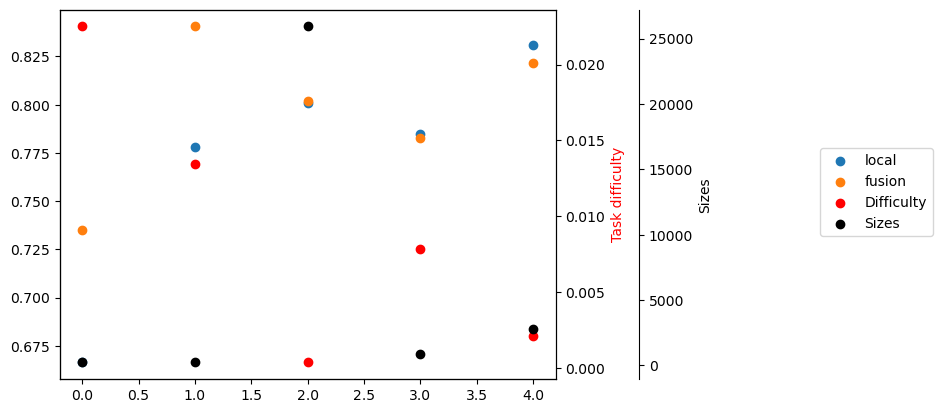

In [478]:
auc_fair = get_auc_local_fusion(Xs_test, ys_test, betas_local, betas_fair_fusion)
plot_score(auc_fair, std_squared, sizes)

In [479]:
std_squared

array([0.02250913, 0.0078502 , 0.00208102, 0.0134247 , 0.00036414])

In [480]:
sizes

array([  286,   895,  2817,   231, 25933])

In [481]:
mse_fair - mse

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-2.29176075e-03, -5.09573145e-06,  4.12909675e-07,
         2.07851711e-03,  0.00000000e+00]])